<h2>Home Buyers (Regression Analysis)</h2>
<ul>
    <b>Features</b>
  <li>Area Type</li>
  <li>Availability</li>
  <li>Location</li>
  <li>Price</li>
  <li>Size</li>
  <li>Society</li>
  <li>Total Sqft</li>
  <li>Bath</li>
  <li>Balcony</li>
</ul>


<h3>Things to consider: </h3>
<ol>
    <li>location</li>
    <li>property size</li>
    <li>proximity to essential
     amenities (offices, schools, parks, restaurants, hospitals)</li>
    <li>price when purchasing a house</li>
</ol>
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcReojsrdr9iv1gI7XTUA4XKswXMfshtHUjDDA&s'>

In [1]:
# Import necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, GridSearchCV

#Import lobraries for data transformation and model building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import  LabelEncoder

In [2]:
# A python Class to load data
class LoadData():
    def __init__(self, data):
        self.data = data
    def ReadData(self):
        df = pd.read_csv(self.data)
        return df

In [3]:
# Create class instance
d = LoadData('bengaluru_house_prices.csv')
df = d.ReadData()

In [4]:
# View data
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
# Get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
# Check count of missing value
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<p>There are obvious missing values</p>

In [7]:
# Check percentage of missing value
(df.isnull().sum())/len(df) * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [8]:
# filling up missing data
df.size = df['size'].ffill()
df.balcony = df['balcony'].fillna(df.balcony.median())
df.bath = df['bath'].fillna(df.bath.median())

<h2> Create a function to cleanse and convert total_sqft to float</h2>

In [9]:
def convert_sqft_to_num(x):
    if '-' in x:
        nums = x.split('-')
        return (float(nums[0]) + float(nums[1])) / 2
    try:
        return float(x)
    except:
        return None

In [10]:
# Save the transformed column back to its original column
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [11]:
df['price_per_sqft'] = df.price / df.total_sqft

In [12]:
# Get data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13274.0,1559.626694,1238.405258,1.000000,1100.000000,1276.000000,1680.000000,52272.0
bath,13320.0,2.688814,1.338754,1.000000,2.000000,2.000000,3.000000,40.0
balcony,13320.0,1.603378,0.803067,0.000000,1.000000,2.000000,2.000000,3.0
price,13320.0,112.565627,148.971674,8.000000,50.000000,72.000000,120.000000,3600.0
price_per_sqft,13274.0,0.079075,1.064296,0.002678,0.042669,0.054343,0.073117,120.0


In [13]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,0.036998
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,0.046154
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,0.043056
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,0.062459
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,0.042500


### Dropping columns
* Availability column will not add anything to my model
* Society column has more than 41% of missing data
* Location column is already grouped in area_type so it should be dropped

In [14]:
# Drop society, location & availability column 
df.drop(columns= ['society','location','availability','total_sqft'], inplace =True)

In [15]:
# Filling up total_sqft by mean
df['price_per_sqft'] = df['price_per_sqft'].fillna(df.price_per_sqft.mean())

<h2>Check for possible outlier</h2>

In [16]:
#Make a histogram for balcony
df.balcony.value_counts()

balcony
2.0    5722
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

<Axes: xlabel='bath'>

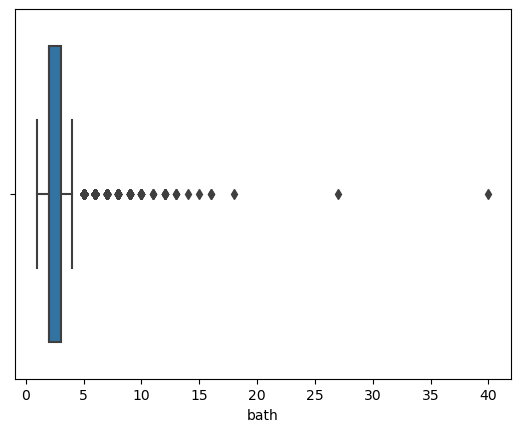

In [17]:
# Make a boxplot for bath
sb.boxplot(data=df, x='bath')

In [18]:
# Remove Outlier
df = df[(df['bath']< 5) & (df['price'] < 1500)]

In [19]:
# Encode Categorical columns
le = LabelEncoder()
df['area_type'] = le.fit_transform(df['area_type'])
df['size'] = le.fit_transform(df['size'])

In [20]:
# Split data and prepare it for modeling
X = df.drop(['price'], axis=1)  # Features
y = df['price']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Test for linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [22]:
# Check prediction score
lr.score(X_test, y_test)

0.29866089595595624

In [23]:
# Check for Random forest model and score
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6204235520921881

<h2>Evaluate Random Forest</h2>

In [24]:
# Model Evaluation
predictions = rf.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f"MAE: {mae}, MSE: {mse}")

MAE: 21.390827217205857, MSE: 2969.7836964048247


<h2>Hyperparameter tunning</h2>

In [27]:
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 10, 'n_estimators': 200}


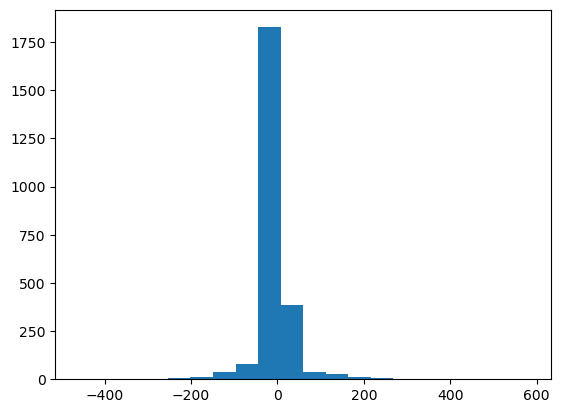

In [31]:
residuals = y_test - predictions
plt.hist(residuals, bins=20)
plt.show()


In [29]:
rf_mod = RandomForestRegressor(max_depth=10, n_estimators=200)
rf_mod.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [30]:
rf_mod.score(X_test,y_test)

0.6682742672601375

In [ ]:
import joblib
joblib.dump(rf, 'home_buyers.pkl')